In [28]:
import requests
import pandas as pd
import os
import mlflow
from sklearn.metrics import classification_report
import numpy as np

current_path = os.path.dirname(os.getcwd())

file_path = current_path+"/data/01_raw/dataset_kobe_prod.parquet"
data = pd.read_parquet(file_path)


data_filtered = data.dropna()

X_test = data_filtered[['lat','lon','minutes_remaining','period','playoffs','shot_distance']]
Y_test = data_filtered[['shot_made_flag']]


response = requests.post('http://127.0.0.1:5001/invocations', json= {'inputs': X_test.values.tolist() }  )


predict = response.json()


y_pred = predict['predictions']



In [29]:
final_= X_test.copy()

final_['y_pred'] = y_pred
final_['y'] = Y_test

final_

,lat,lon,minutes_remaining,period,playoffs,shot_distance,y_pred,y
10,33.8063,-118.3638,1,3,0,25,0.0,0.0
17,33.8183,-118.3868,8,2,0,25,0.0,1.0
27,33.8583,-118.4528,0,3,0,26,0.0,0.0
39,33.7723,-118.2968,0,2,0,27,0.0,1.0
55,33.8503,-118.4248,2,1,0,24,0.0,0.0
...,...,...,...,...,...,...,...,...
30675,33.8283,-118.4038,2,1,1,25,0.0,0.0
30681,33.7833,-118.2878,0,2,1,26,0.0,1.0
30685,33.7943,-118.1888,7,3,1,26,0.0,0.0
30689,33.3653,-118.2818,0,3,1,67,0.0,0.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


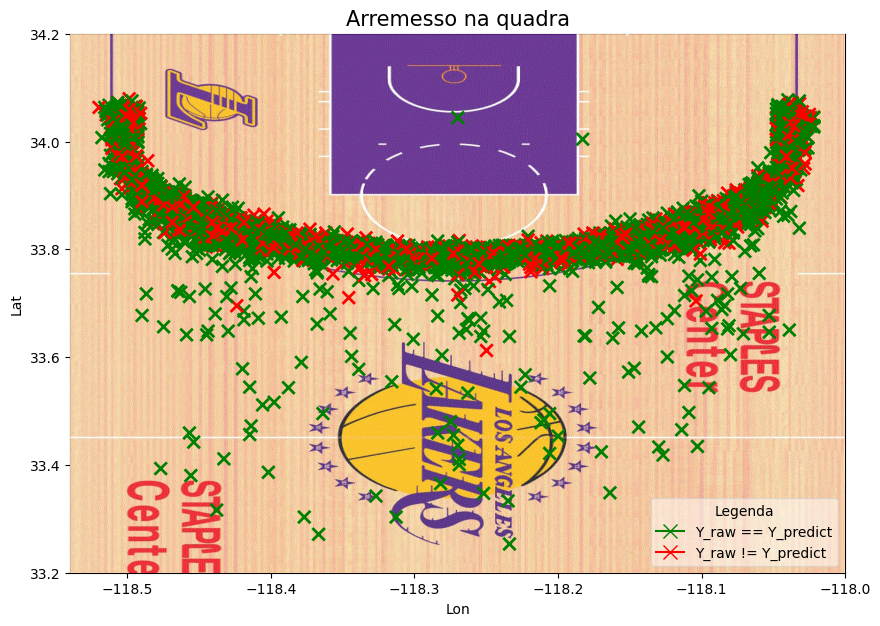

In [47]:

from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from matplotlib.lines import Line2D


lat= X_test['lat']
lon= X_test['lon']
color = ["green" if shot == y_pred[index] else "red" for index, shot in enumerate(Y_test.values.ravel())]

fig, ax = plt.subplots(figsize=(10, 7))

plt.legend(loc="upper left", bbox_to_anchor=(1, 1)) 
image = mpimg.imread(current_path+"/streamlit/lakers.gif")


ax.imshow(image, extent=[-118.54, -118 ,33.2, 34.2], aspect='auto', alpha=0.9,zorder=5)  

custom_legend = [
    Line2D([0], [0], marker="x", color="green", markerfacecolor="green", markersize=10, label="Y_raw == Y_predict"),
    Line2D([0], [0], marker="x", color="red", markerfacecolor="red", markersize=10, label="Y_raw != Y_predict")
]

# Adicionar legenda ao gráfico
plt.legend(handles=custom_legend, loc="lower right", title="Legenda",frameon=True, fancybox=True, framealpha=0.5) 

ax.scatter(lon, lat,s=80, c=color,marker='x' ,alpha=1, label='Arremesso',zorder=10, linewidths=2)
plt.ticklabel_format(style="plain", axis="both",useOffset=False)
plt.title('Arremesso na quadra', fontsize=15)
plt.xlabel('Lon')
plt.ylabel('Lat')

plt.show()  

In [48]:

performance_producao = classification_report(Y_test, y_pred, output_dict=True)

print(performance_producao)


{'0.0': {'precision': 0.6707317073170732, 'recall': 1.0, 'f1-score': 0.8029197080291971, 'support': 3630.0}, '1.0': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 1782.0}, 'accuracy': 0.6707317073170732, 'macro avg': {'precision': 0.3353658536585366, 'recall': 0.5, 'f1-score': 0.40145985401459855, 'support': 5412.0}, 'weighted avg': {'precision': 0.44988102320047596, 'recall': 0.6707317073170732, 'f1-score': 0.5385437066049493, 'support': 5412.0}}


c:\Users\belch\anaconda3\envs\kedro_py311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\belch\anaconda3\envs\kedro_py311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\belch\anaconda3\envs\kedro_py311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le

In [81]:
performance_producao['macro avg']['f1-score']

0.40145985401459855

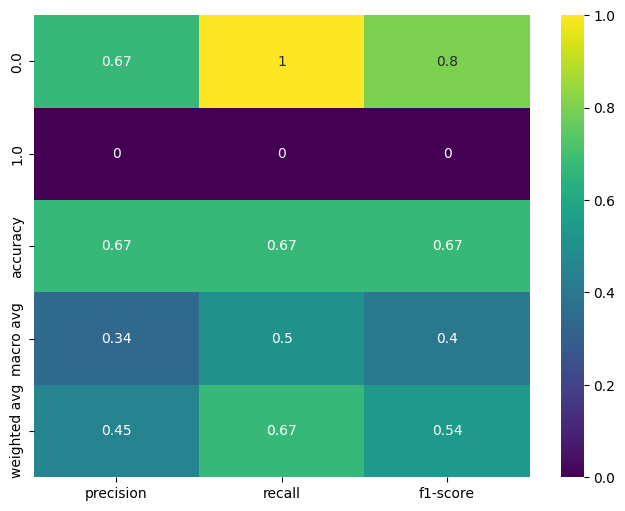

In [ ]:

# .iloc[:-1, :] to exclude support
import seaborn

plt.figure(figsize=(8, 6))
seaborn.heatmap(pd.DataFrame(performance_producao).iloc[:-1, :].T, annot=True, cmap="viridis")

c:\Users\belch\anaconda3\envs\kedro_py311\Lib\site-packages\mlflow\store\artifact\utils\models.py:32: FutureWarning: ``mlflow.tracking.client.MlflowClient.get_latest_versions`` is deprecated since 2.9.0. Model registry stages will be removed in a future major release. To learn more about the deprecation of model registry stages, see our migration guide here: https://mlflow.org/docs/latest/model-registry.html#migrating-from-stages
  latest = client.get_latest_versions(name, None if stage is None else [stage])


             Feature  Importance  Absolute Importance
5      shot_distance   -0.845988             0.845988
0                lat   -0.178697             0.178697
3             period   -0.092620             0.092620
1                lon    0.028340             0.028340
4           playoffs    0.018511             0.018511
2  minutes_remaining    0.004609             0.004609


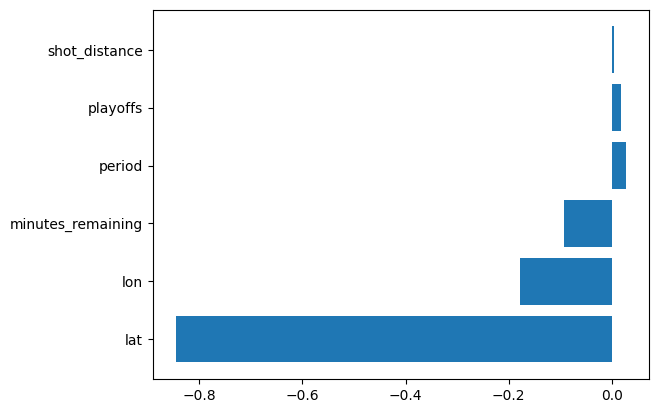

In [ ]:
import matplotlib.pyplot as plt

current_path = os.path.dirname(os.getcwd())

file_path = current_path+"/mlruns"

mlflow.set_tracking_uri(f"file:///{file_path}") 

model_uri = "models:/kobe_lr_model_prod/latest"  

   
model = mlflow.sklearn.load_model(model_uri)

feature_names = ['lat','lon','minutes_remaining','period','playoffs','shot_distance']
coefficients = model.coef_[0]  
feature_importance = pd.DataFrame({
    "Feature": feature_names,
    "Importance": coefficients
})
feature_importance["Absolute Importance"] = np.abs(feature_importance["Importance"])
feature_importance = feature_importance.sort_values(by="Absolute Importance", ascending=False)

# Display feature importance
print(feature_importance)

plt.barh(y=feature_names, width=feature_importance['Importance'].values)
plt.show()

In [ ]:
data_filtered

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
10,Jump Shot,Jump Shot,309,20000012,33.8063,-94,238,-118.3638,1,3,...,3PT Field Goal,Left Side Center(LC),Above the Break 3,24+ ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,11
17,Jump Shot,Jump Shot,138,20000019,33.8183,-117,226,-118.3868,8,2,...,3PT Field Goal,Left Side Center(LC),Above the Break 3,24+ ft.,1610612747,Los Angeles Lakers,2000-11-01,LAL vs. UTA,UTA,18
27,Jump Shot,Jump Shot,369,20000019,33.8583,-183,186,-118.4528,0,3,...,3PT Field Goal,Left Side Center(LC),Above the Break 3,24+ ft.,1610612747,Los Angeles Lakers,2000-11-01,LAL vs. UTA,UTA,28
39,Jump Shot,Jump Shot,202,20000047,33.7723,-27,272,-118.2968,0,2,...,3PT Field Goal,Center(C),Above the Break 3,24+ ft.,1610612747,Los Angeles Lakers,2000-11-04,LAL @ VAN,VAN,40
55,Jump Shot,Jump Shot,80,20000049,33.8503,-155,194,-118.4248,2,1,...,3PT Field Goal,Left Side Center(LC),Above the Break 3,24+ ft.,1610612747,Los Angeles Lakers,2000-11-05,LAL vs. LAC,LAC,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30675,Jump Shot,Jump Shot,84,49900088,33.8283,-134,216,-118.4038,2,1,...,3PT Field Goal,Left Side Center(LC),Above the Break 3,24+ ft.,1610612747,Los Angeles Lakers,2000-06-19,LAL vs. IND,IND,30676
30681,Jump Shot,Jump Shot,218,49900088,33.7833,-18,261,-118.2878,0,2,...,3PT Field Goal,Center(C),Above the Break 3,24+ ft.,1610612747,Los Angeles Lakers,2000-06-19,LAL vs. IND,IND,30682
30685,Jump Shot,Jump Shot,249,49900088,33.7943,81,250,-118.1888,7,3,...,3PT Field Goal,Center(C),Above the Break 3,24+ ft.,1610612747,Los Angeles Lakers,2000-06-19,LAL vs. IND,IND,30686
30689,Jump Shot,Jump Shot,326,49900088,33.3653,-12,679,-118.2818,0,3,...,3PT Field Goal,Back Court(BC),Backcourt,Back Court Shot,1610612747,Los Angeles Lakers,2000-06-19,LAL vs. IND,IND,30690
